In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import sys

sys.path.append(
    "/Users/justyna/Desktop/studia/magisterka/semestr_1/sieci_zlozone/laboratoria/complex-networks-project"
)


from src.collaborative_filtering import get_recommendations_cf

## Wykres


In [5]:
output = (
    pd.DataFrame(pd.read_json("../output/precision_for_method.json"))
    .T.reset_index()
    .rename(columns={"index": "method"})
    .drop(columns="execution_time")
)

output["method"] = output["method"].str.replace("_", " ")

output_melted = output.melt(
    id_vars="method",
    value_vars=["precision", "recall"],
    var_name="metryka",
    value_name="value",
)

In [6]:
metric_name_map = {
    "precision": "precision@15",
    "recall": "recall@15",
    "execution_time": "execution time",
}
output_melted["metryka"] = output_melted["metryka"].map(metric_name_map)

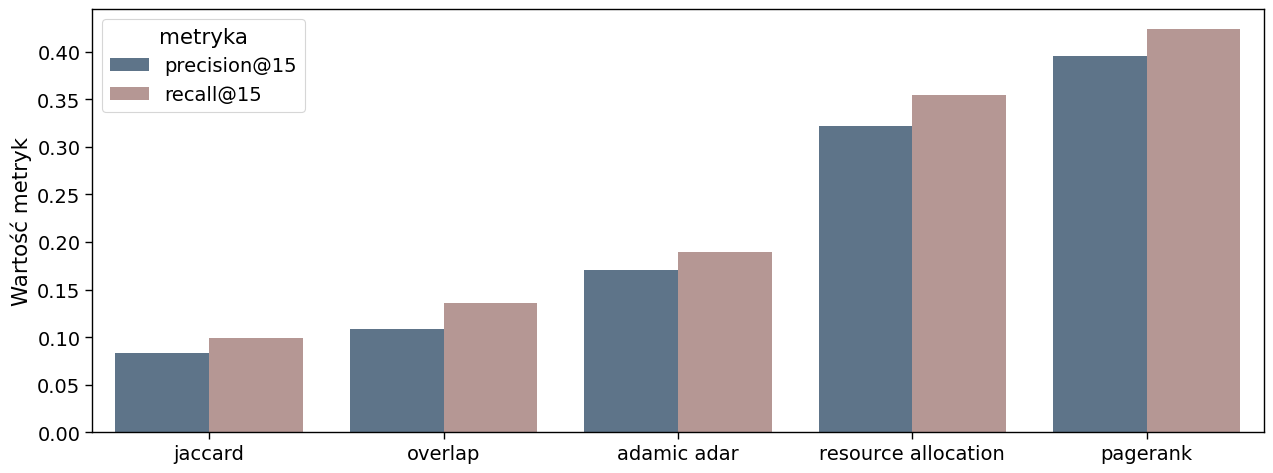

In [10]:
plt.figure(figsize=(13, 5))

# make me color palette #577490 #BA928F

# make context for font size - poster
sns.set_context("paper", font_scale=1.6)

palette = ["#577490", "#BA928F"]

sns.barplot(data=output_melted, x="method", y="value", hue="metryka", palette=palette)
# plt.title("Porównanie metryk precision@15 i recall@15 dla wszystkich metod")
plt.ylabel("Wartość metryk")
plt.xlabel("")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../output/pictures/comparison.png")

## Przykład


In [5]:
from src.utils import create_bipartite_from_pkl, get_books_for_user
from src.collaborative_filtering import get_recommendations_cf
from src.personalized_pagerank import get_recommendations_ppr

In [6]:
path_to_graph = "../data/bipartite_graph.gpickle"
graph = create_bipartite_from_pkl(path_to_graph)
print("loaded graph")

all_users = [n for n, d in graph.nodes(data=True) if d.get("bipartite") == "users"]

loaded graph


In [7]:
user = all_users[2]

In [8]:
methods = ["jaccard", "overlap", "adamic_adar", "resource_allocation"]

In [9]:
recommendations = {}
for method in methods:
    recommendations[method] = get_recommendations_cf(graph, user, method=method)
recommendations["pagerank"] = get_recommendations_ppr(graph, user)


KeyboardInterrupt



In [ ]:
recommendations

In [ ]:
books_data = pd.read_json("../data/goodreads_books.json", lines=True)